In [67]:
import numpy as np
import matplotlib.pyplot as plt

## Class Exercises. Set 2. Linear Regression
1. We measure the height of a rocket at fixed time intervals as the data pair $(s, t)$. The time t is the time
in seconds and s is in meters. The observations are: for times $t=[5, 10, 15, 20, 25, 30]$, with heights $h=[722,
1073, 1178, 1177, 781, 102]^T$ respectively. Suppose a model $s = a + bt + ct^2$.


In [68]:
# Extract the data:
time = np.array([5, 10, 15, 20, 25, 30], dtype='float')
height =  np.array([722, 1073, 1178, 1177, 781, 102], dtype='float')

a) Compute the values of a, b, and c with linear regression (without regularization).

In [69]:
# Compute observation matrix:
x = np.array([np.ones_like(time), time, time**2]).T
n = x.shape[1]

# Calculate the optimal solution:
param1 = np.linalg.inv(x.T @ x) @ x.T @ height
print("[a,b,c].T = ", param1)

# Compute the eigen values and find if x.T @ x is invertible:
eigen_values, eigen_vectors = np.linalg.eig(x.T @ x)
if True in [np.isclose(eigen_value, 0) for eigen_value in eigen_values]:
    print("x.T @ x is not invertible.")
else:
    print("x.T @ x is invertible.")
    
    # Compute the estimated height:
    height_est = param1[0] + time * param1[1] + time**2 * param1[2]
    
    # Compute the MSE:
    mse1 = np.average((height_est - height)**2)
    print(f"MSE 1 = {mse1:.2f}")

[a,b,c].T =  [ 44.2        156.12428571  -5.11      ]
x.T @ x is invertible.
MSE 1 = 1485.01


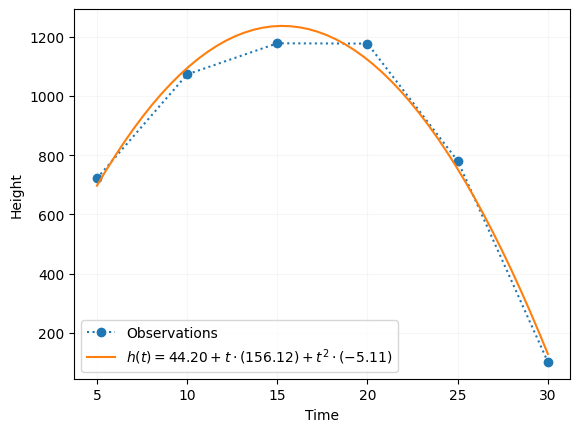

In [70]:
# Plot the result:
plt.plot(time, height, ':o', label='Observations')
smoother_time = np.linspace(time[0], time[-1])
plt.plot(smoother_time, param1[0] + smoother_time * param1[1] + smoother_time**2 * param1[2],
         label=f"$h(t)={param1[0]:.2f} + t \cdot ({param1[1]:.2f}) + t^2 \cdot ({param1[2]:.2f})$")
plt.xlabel("Time")
plt.ylabel("Height")
plt.grid(alpha=.1)
plt.legend()

b) Compute the values of a, b, and c with linear ridge regression, setting lambda = 0.5

In [71]:
regularization_factor = .5 # Lambda
n = x.shape[1]

# Calculate the optimal solution:
param2 = np.linalg.inv(x.T @ x + np.identity(n) * regularization_factor) @ x.T @ height
print("[a,b,c].T = ", param2)

# Compute the eigen values and find if x.T @ x is invertible:
eigen_values, eigen_vectors = np.linalg.eig(x.T @ x + np.identity(n) * regularization_factor)
if True in [np.isclose(eigen_value, 0) for eigen_value in eigen_values]:
    print("x.T @ x is not invertible.")
else:
    print("x.T @ x is invertible.")

    # Compute the estimated height:
    height_est = param2[0] + time * param2[1] + time**2 * param2[2]
    
    # Compute the MSE:
    mse2 = np.average((height_est - height)**2)
    print(f"MSE 2= {mse2:.2f}")

[a,b,c].T =  [ 28.81692798 157.42734984  -5.13590407]
x.T @ x is invertible.
MSE 2= 1504.85


c) What's the average squared error for both models in the 6 points?

In [72]:
print(f"MSE 1 = {mse1:.2f}")
print(f"MSE 2 = {mse2:.2f}")

MSE 1 = 1485.01
MSE 2 = 1504.85


d) * An advantage of Ridge Regression is that a unique solution always exists since $(X^tX + λI)$ is always invertible. Remind that to be invertible, a matrix needs to be full rank. Show that $(X^tX + λI)$ is full rank by characterizing its $p$ eigenvalues in terms of the singular values of $X^tX$ and $λI$.

Answer: Suppose the eigenvalues of $X^tX$ are $λ_1, λ_2, \dots, λ_n$, where $\prod_{i=1}^n λ_i \neq 0$. 
$SVD(X^tX) = M^t λ M$
$SVD(λI) = $

2. Consider the following data:


In [73]:
# Extract the data:
x1 = np.array([368, 340, 665, 954, 331])
x2 = np.array([15, 16, 25, 40, 15])
x = np.array([x1, x2], dtype='float').T
y = np.array([1.7, 1.5, 2.8, 5, 1.3])


In [74]:
# Calculate the parameters considering a regularization factor:
param = np.linalg.inv(x.T @ x) @ x.T @ y
print("[w1, w2].T = ", param)

# Compute the eigen values and find if x.T @ x is invertible:
eigen_values, eigen_vectors = np.linalg.eig(x.T @ x)
if True in [np.isclose(eigen_value, 0) for eigen_value in eigen_values]:
    print("x.T @ x is not invertible.")
else:
    print("x.T @ x is invertible.")

    # Compute the estimated height:
    y_est = param[0] * x1 + param[1] * x2
    mse = np.linalg.norm(y - y_est)**2
    print(f"MSE = {mse:.4f}")

[w1, w2].T =  [0.00277318 0.0487576 ]
x.T @ x is invertible.
MSE = 0.4069


In [75]:
# Extract the data:
x1 = np.array([368, 340, 665, 954, 331])
x2 = np.array([15, 16, 25, 40, 15])
x3 = np.array([383, 356, 690, 994, 346])
x = np.array([x1, x2, x3], dtype='float').T
y = np.array([1.7, 1.5, 2.8, 5, 1.3])

In [76]:
# Calculate the parameters considering a regularization factor:
param = np.linalg.inv(x.T @ x) @ x.T @ y
print("[w1, w2, w3].T = ", param)

# Compute the eigen values and find if x.T @ x is invertible:
eigen_values, eigen_vectors = np.linalg.eig(x.T @ x)
print(f"Eigen Values: {eigen_values}")
if True in [np.isclose(eigen_value, 0) for eigen_value in eigen_values]:
    print("x.T @ x is not invertible.")
else:
    print("x.T @ x is invertible.")

    # Compute the estimated height:
    y_est = param[0] * x1 + param[1] * x2 + param[2] * x3
    mse = np.linalg.norm(y - y_est)**2
    print(f"MSE = {mse:.4f}")

[w1, w2, w3].T =  [-0.00187988  0.03930664  0.00966797]
Eigen Values: [3.57311664e+06 1.39831258e-10 1.73646775e+01]
x.T @ x is not invertible.


Since the new feature $x_3=x_2+x_1$, the new set of solution is a hyper-plane in $R^3$ where is is linear independent in $x_1$ and $x_2$. 